In [1]:
# !wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip

<PIL.Image.Image image mode=RGB size=150x150 at 0x7F337167A8E0>


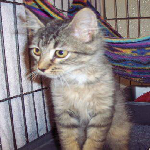

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
path_train = './data/train'
path_val = './data/validation'

img = load_img(path_train+"/cats/cat.2.jpg", target_size=(150, 150))
print(img)
display(img)
# imgArray = np.array(img)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input


# train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
# #                                rotation_range=30,
# #                                width_shift_range=10.0,
# #                                height_shift_range=10.0,
# #                                shear_range=10,
# #                                zoom_range=0.1,
# #                                vertical_flip=True,
#                               )

# train_ds = train_gen.flow_from_directory(path_train, 
#                                          target_size=(150,150), 
#                                          batch_size=32)
# print("Infered class_indices from folders:", train_ds.class_indices)
# print()


# val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #no augmentation, we want realistic results

# val_ds = val_gen.flow_from_directory(path_val, 
#                                      target_size=(150,150), 
#                                      batch_size=32,
#                                      shuffle=True)

# base_model = Xception(weights='imagenet', 
#                       include_top=False, #don't include the dense layers
#                       input_shape=(150,150,3))

# base_model.trainable = False #freeze convolutional layers

# # create a covolutional layer
# inputs = keras.Input(shape=(150,150,3))
# base = base_model(inputs, training=False)
layer_conv2D=tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        input_shape=(150,150,3) ,
#         strides=(1, 1),
#         padding="valid",
#         data_format=None,
#         dilation_rate=(1, 1),
#         groups=1,
        activation='relu',
#         use_bias=True,
#         kernel_initializer="glorot_uniform",
#         bias_initializer="zeros",
#         kernel_regularizer=None,
#         bias_regularizer=None,
#         activity_regularizer=None,
#         kernel_constraint=None,
#         bias_constraint=None
    )
# print("Conv2D shape=",layer_conv2D(inputs).shape)

layer_max_pool_2d = tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
#     strides=None, 
#     padding="valid", 
#     data_format=None, 
#     **kwargs
)
# print("max_pool_2d shape=",layer_max_pool_2d(layer_conv2D(inputs)).shape)

layer_flatten = tf.keras.layers.Flatten(
#         data_format=None,
#         **kwargs
    )

def prepare_model():
    model = tf.keras.Sequential()
    model.add(layer_conv2D)
    model.add(layer_max_pool_2d)
    model.add(layer_flatten)
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid')) # https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
#     model.add(keras.layers.Dense(1))  #ASK!
    print("Model shape: ",model.output_shape)
    return model

print("model method prepared")

model method prepared


In [ ]:
# Q1

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                                rotation_range=30,
#                                width_shift_range=10.0,
#                                height_shift_range=10.0,
#                                shear_range=10,
#                                zoom_range=0.1,
#                                vertical_flip=True,
                              )

train_ds = train_gen.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         batch_size=32)
print("Infered class_indices from folders:", train_ds.class_indices)
print()


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input) #no augmentation, we want realistic results

val_ds = val_gen.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     batch_size=32,
                                     shuffle=True)



optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)

losses = {
    'MeanSquaredError': keras.losses.MeanSquaredError(),
#     'CategoricalCrossentropy': keras.losses.CategoricalCrossentropy(),
    'BinaryCrossentropy': keras.losses.BinaryCrossentropy(from_logits=False),    
}

scores = {}

for k,loss in losses.items():
    print("Processing loss:", k)
    model = prepare_model()
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(train_ds, epochs=1, validation_data=val_ds)
    scores[k] = history.history

scores


Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Processing loss: MeanSquaredError
Model shape:  (None, 1)
625/625 [==============================] - 153s 244ms/step - loss: 0.2502 - accuracy: 0.5000 - val_loss: 0.2501 - val_accuracy: 0.5000
Processing loss: BinaryCrossentropy
Model shape:  (None, 1)
625/625 [==============================] - ETA: 0s - loss: 0.6934 - accuracy: 0.5000

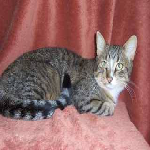

(1, 150, 150, 3)
Model shape:  (None, 1)


array([[0.42599505]], dtype=float32)

In [20]:
path_cat = 'data/validation/cats/cat.10004.jpg'
path_dog = 'data/validation/dogs/dog.10008.jpg'

img = load_img(path_cat, target_size=(150,150))
display(img)

x = np.array(img)
X = np.array([x])
print(X.shape)

X = preprocess_input(X)
model = prepare_model()
model.predict(X)


In [21]:
# Q2

def build_model(model):
    optimizer = tf.keras.optimizers.SGD(lr=0.002, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy(from_logits=False),    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    return model

base_model = build_model(prepare_model())

# history = model.fit(train_ds, epochs=1, validation_data=val_ds)
base_model.summary()

Model shape:  (None, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 175232)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                11214912  
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Q3

train_gen1 = ImageDataGenerator(rescale=1./255)
train_ds1 = train_gen1.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds1.class_indices)
print()


val_gen1 = ImageDataGenerator(rescale=1./255)
val_ds1 = val_gen1.flow_from_directory(path_val, 
                                       target_size=(150,150), 
                                       class_mode='binary',
                                       batch_size=20,
                                       shuffle=True #ASK!
                                      )

history1 = base_model.fit(
    train_ds1,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds1,
    validation_steps=50
)
history1.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 18s 171ms/step - loss: 0.6998 - accuracy: 0.4985 - val_loss: 0.6927 - val_accuracy: 0.5380
Epoch 2/10
100/100 [==============================] - 18s 175ms/step - loss: 0.6928 - accuracy: 0.5260 - val_loss: 0.6909 - val_accuracy: 0.5310
Epoch 3/10
100/100 [==============================] - 18s 183ms/step - loss: 0.6917 - accuracy: 0.5410 - val_loss: 0.6892 - val_accuracy: 0.5630
Epoch 4/10
100/100 [==============================] - 21s 206ms/step - loss: 0.6883 - accuracy: 0.5620 - val_loss: 0.6880 - val_accuracy: 0.4980
Epoch 5/10
100/100 [==============================] - 17s 168ms/step - loss: 0.6842 - accuracy: 0.5510 - val_loss: 0.6876 - val_accuracy: 0.5010
Epoch 6/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6803 - accuracy: 0.5680 - val_loss: 0.6798 - val_ac

{'loss': [0.6998350620269775,
  0.6927982568740845,
  0.6916910409927368,
  0.6882719993591309,
  0.6842108964920044,
  0.6803319454193115,
  0.6783173680305481,
  0.6685847043991089,
  0.66494220495224,
  0.6595548987388611],
 'accuracy': [0.4984999895095825,
  0.5260000228881836,
  0.5410000085830688,
  0.5619999766349792,
  0.5509999990463257,
  0.5680000185966492,
  0.5669999718666077,
  0.5914999842643738,
  0.5995000004768372,
  0.6050000190734863],
 'val_loss': [0.6927012205123901,
  0.6909229755401611,
  0.6892361044883728,
  0.6879780292510986,
  0.6875733137130737,
  0.6798219084739685,
  0.6811965703964233,
  0.7070226669311523,
  0.6426359415054321,
  0.6529591679573059],
 'val_accuracy': [0.5379999876022339,
  0.531000018119812,
  0.5630000233650208,
  0.49799999594688416,
  0.5009999871253967,
  0.5759999752044678,
  0.5479999780654907,
  0.5149999856948853,
  0.6389999985694885,
  0.6079999804496765]}

In [24]:
# Q3
print('median of training accuracy:', np.median(history1.history['accuracy']))
# Q4
print('standard deviation of training loss:', np.std(history1.history['loss']))

median of training accuracy: 0.5644999742507935
standard deviation of training loss: 0.01245296152391469


In [25]:
train_gen2 = ImageDataGenerator(preprocessing_function=preprocess_input,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                               )

train_ds2 = train_gen2.flow_from_directory(path_train, 
                                         target_size=(150,150), 
                                         class_mode='binary',
                                         batch_size=20)
print("Infered class_indices from folders:", train_ds2.class_indices)
print()


val_gen2 = ImageDataGenerator(rescale=1./255)
val_ds2 = val_gen2.flow_from_directory(path_val, 
                                     target_size=(150,150), 
                                     class_mode='binary',
                                     batch_size=20,
                                     shuffle=True #ASK!
                                      )


history2 = base_model.fit(
    train_ds2,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds2,
    validation_steps=50
)
history2.history

Found 20000 images belonging to 2 classes.
Infered class_indices from folders: {'cats': 0, 'dogs': 1}

Found 5000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 24s 237ms/step - loss: 0.6693 - accuracy: 0.6010 - val_loss: 0.7496 - val_accuracy: 0.5030
Epoch 2/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6720 - accuracy: 0.5750 - val_loss: 0.6568 - val_accuracy: 0.5910
Epoch 3/10
100/100 [==============================] - 26s 260ms/step - loss: 0.6569 - accuracy: 0.6105 - val_loss: 0.6390 - val_accuracy: 0.6330
Epoch 4/10
100/100 [==============================] - 28s 276ms/step - loss: 0.6558 - accuracy: 0.6050 - val_loss: 0.6548 - val_accuracy: 0.6320
Epoch 5/10
100/100 [==============================] - 25s 252ms/step - loss: 0.6488 - accuracy: 0.6200 - val_loss: 0.6688 - val_accuracy: 0.5950
Epoch 6/10
100/100 [==============================] - 28s 275ms/step - loss: 0.6437 - accuracy: 0.6195 - val_loss: 0.6466 - val_ac

{'loss': [0.6692744493484497,
  0.6720009446144104,
  0.6569496989250183,
  0.6557518839836121,
  0.6487825512886047,
  0.6437302827835083,
  0.6609411239624023,
  0.64845210313797,
  0.6426632404327393,
  0.632826566696167],
 'accuracy': [0.6010000109672546,
  0.574999988079071,
  0.6104999780654907,
  0.6050000190734863,
  0.6200000047683716,
  0.6194999814033508,
  0.5950000286102295,
  0.6209999918937683,
  0.6205000281333923,
  0.6355000138282776],
 'val_loss': [0.7495716214179993,
  0.6567577123641968,
  0.6389642953872681,
  0.6547988653182983,
  0.6687822937965393,
  0.646619975566864,
  0.643966555595398,
  0.6533708572387695,
  0.6388929486274719,
  0.6896931529045105],
 'val_accuracy': [0.503000020980835,
  0.5910000205039978,
  0.6330000162124634,
  0.6320000290870667,
  0.5950000286102295,
  0.5860000252723694,
  0.6359999775886536,
  0.6029999852180481,
  0.6340000033378601,
  0.5730000138282776]}

In [26]:
# Q5
print('mean of validation loss:', np.mean(history2.history['val_loss']))
# Q4
val_accuracy_last5 = history2.history['val_accuracy'][-5:]
print('average of last 5 values for validation accuracy:', np.mean(val_accuracy_last5))
print('average of last 5 values for validation accuracy:', np.sum(val_accuracy_last5)/len(val_accuracy_last5))

mean of validation loss: 0.6641418278217316
average of last 5 values for validation accuracy: 0.6064000010490418
average of last 5 values for validation accuracy: 0.6064000010490418


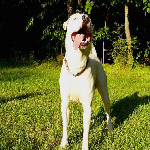

(1, 150, 150, 3)
Model shape:  (None, 1)


array([[0.4577336]], dtype=float32)

In [28]:
path_cat = 'data/validation/cats/cat.10004.jpg'
path_dog = 'data/validation/dogs/dog.10008.jpg'

img = load_img(path_dog, target_size=(150,150))
display(img)

x = np.array(img)
X = np.array([x])
print(X.shape)

X = preprocess_input(X)
base_model = prepare_model()
base_model.predict(X)
